In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pickle
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# loading the data
training_images = pickle.load(open("creating the dataset/training_images.pickle", "rb"))
training_labels = pickle.load(open("creating the dataset/training_labels.pickle", "rb"))

In [2]:
# normalize the pixel values from 0-255 to 0-1
training_images = training_images/255

In [3]:
# building the architecture for the model
model = models.Sequential()

# first conv2D
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# second conv2D
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# third conv2D
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

W0810 02:07:13.956136 4525139392 deprecation.py:506] From /Users/Brian.Chan/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [4]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# training the model
model.fit(training_images, training_labels, batch_size=32, epochs=5, validation_split=0.2, )

W0810 02:07:14.185784 4525139392 deprecation.py:323] From /Users/Brian.Chan/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 19956 samples, validate on 4990 samples
Epoch 1/5
19956/19956 [==============================] - 130s 7ms/sample - loss: 0.6588 - acc: 0.5832 - val_loss: 0.5810 - val_acc: 0.6934
Epoch 2/5
19956/19956 [==============================] - 128s 6ms/sample - loss: 0.5286 - acc: 0.7345 - val_loss: 0.4780 - val_acc: 0.7806
Epoch 3/5
19956/19956 [==============================] - 128s 6ms/sample - loss: 0.4498 - acc: 0.7881 - val_loss: 0.4530 - val_acc: 0.8004
Epoch 4/5
19956/19956 [==============================] - 129s 6ms/sample - loss: 0.3929 - acc: 0.8226 - val_loss: 0.4262 - val_acc: 0.8020
Epoch 5/5
19956/19956 [==============================] - 128s 6ms/sample - loss: 0.3488 - acc: 0.8447 - val_loss: 0.4068 - val_acc: 0.8208


In [5]:
# saving the model for future use. must be .model
model.save("kaggle_cnn.model")

In [6]:
# load a model for prediction
new_model = tf.keras.models.load_model("kaggle_cnn.model")

W0810 02:17:58.912036 4525139392 deprecation.py:506] From /Users/Brian.Chan/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0810 02:17:58.915514 4525139392 deprecation.py:506] From /Users/Brian.Chan/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
def prepare_img(test_dir, test_img):
    # open test image as array
    img_array = cv2.imread(os.path.join(test_dir, test_img), cv2.IMREAD_GRAYSCALE)
    
    # find smallest dimesion to crop the image to a square
    smallest_dimention = np.min(img_array.shape)

    # origin is at top left
    # find top left coordinate of cropped image
    height_start = int((img_array.shape[0] - smallest_dimention) / 2)
    width_start = int((img_array.shape[1] - smallest_dimention) / 2)

    # find bottom right coordinate of cropped image
    height_end = int(height_start + smallest_dimention)
    width_end = int(width_start + smallest_dimention)

    # center crop the image 
    cropped_array = img_array[height_start:height_end, width_start:width_end]
    
    # resize the image to correct dimensions
    final_img_array = cv2.resize(cropped_array, (80, 80))
    
    img_array = img_array/255
    
    return final_img_array.reshape(-1, 80, 80, 1)

In [19]:
test_dir = "test"
test_img = "test4.jpg"
categories = ["Dog", "Cat"]

(1, 80, 80, 1)


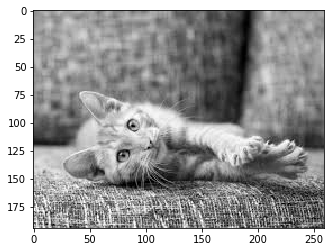

[[0.]]
model predicts: Dog


In [20]:
img_array = prepare_img(test_dir, test_img)
print(img_array.shape)


test_img_array = cv2.imread(os.path.join(test_dir, test_img), cv2.IMREAD_GRAYSCALE)
plt.imshow(test_img_array, cmap="gray")
plt.show()

# make a prediction with the model
prediction = new_model.predict([img_array])
print(prediction)
print("model predicts:", categories[int(prediction[0][0])])